# Sentiment analysis
> - naver movier review

In [1]:
import csv
from pprint import pprint

# tsv load
with open('corpus/naver_movie_corpus/ratings_train.txt', 'r', encoding='utf-8') as f:
    rdr = csv.reader(f, delimiter='\t')
    naver_train = list(rdr)
    naver_train = naver_train[1:]
    
with open('corpus/naver_movie_corpus/ratings_test.txt', 'r', encoding='utf-8') as f:
    rdr = csv.reader(f, delimiter='\t')
    naver_test = list(rdr)
    naver_test = naver_test[1:]

pprint(naver_train[35:42])

[['4726746', '패션에 대한 열정! 안나 윈투어!', '1'],
 ['7203432', '키이라 나이틀리가 연기하고자 했던건 대체 정신장애일까 틱장애일까', '0'],
 ['112724', '허허...원작가 정신나간 유령이라... 재미있겠네요!', '1'],
 ['1105872', '포스터는 있어보이는데 관객은 114명이네', '0'],
 ['4805788', '이 영화가 왜 이렇게 저평가 받는지 모르겠다', '1'],
 ['9336496', '단순하면서 은은한 매력의 영화', '1'],
 ['9994900',
  "'다 알바생인가 내용도 없고 무서운거도 없고 웃긴거도 하나도 없음 완전 별싱거운 영화.ㅇ.ㅇ내ㅇ시간 넘 아까움 .. . 완전 낚임",
  '0']]


In [14]:
# pos tagging, tokenizing
from tqdm import tqdm_notebook
from konlpy.tag import Twitter
tagger = Twitter()

# *****pos tagging에 시간 좀 걸립니다******
def tokenize(doc):
    return ['/'.join(t) for t in tagger.pos(doc, norm=True, stem=True)]

sentences = []
naver_tot = naver_train+naver_test
# naver_tot = naver_tot[:5000] # 노트북에서 돌릴때 데이터 줄이기
for sentence in tqdm_notebook(naver_tot):
    sentences.append(tokenize(sentence[1]))

A Jupyter Widget

In [15]:
print('문장 총 개수: ', len(sentences))
for i in range(5):
    print(sentences[i])

문장 총 개수:  200000
['아/Exclamation', '더빙/Noun', '../Punctuation', '진짜/Noun', '짜증/Noun', '나다/Verb', '목소리/Noun']
['흠/Noun', '.../Punctuation', '포스터/Noun', '보고/Noun', '초딩/Noun', '영화/Noun', '줄/Noun', '..../Punctuation', '오버/Noun', '연기/Noun', '조차/Josa', '가볍다/Adjective', '않다/Verb']
['너무/Noun', '재/Noun', '밓었/Noun', '다/Josa', '그래서/Adverb', '보다/Verb', '추천/Noun', '하다/Verb']
['교도소/Noun', '이야기/Noun', '구먼/Noun', '../Punctuation', '솔직하다/Adjective', '재미/Noun', '는/Josa', '없다/Adjective', '../Punctuation', '평점/Noun', '조정/Noun']
['사이몬페그/Noun', '의/Josa', '익살/Noun', '스런/Josa', '연기/Noun', '가/Josa', '돋보이다/Verb', '영화/Noun', '!/Punctuation', '스파이더맨/Noun', '에서/Josa', '늙다/Verb', '보이다/Verb', '하다/Verb', '크다/Verb', '스틴/Noun', '던스트/Noun', '가/Josa', '너무나/Noun', '도/Josa', '이쁘다/Adjective', '보이다/Verb']


In [16]:
from gensim import models

In [17]:
%%time
size=100
model = models.Word2Vec(size=size, window=7, min_count=5, workers=8,alpha=0.025, min_alpha=0.025)

model.build_vocab(sentences) # 오로지 한번만 스트럭팅 가능

# learning_rate를 낮춰가며 여러번 트레이닝
for epoch in range(15):
    if epoch%1 ==0:
        print('epoch:',epoch, 'train completed')
    model.train(sentences, total_examples=model.corpus_count, epochs=model.iter)
    model.alpha -= 0.002  # decrease the learning rate
    model.min_alpha = model.alpha  # fix the learning rate, no decay

epoch: 0 train completed


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  # Remove the CWD from sys.path while we load stuff.


epoch: 1 train completed
epoch: 2 train completed
epoch: 3 train completed
epoch: 4 train completed
epoch: 5 train completed
epoch: 6 train completed
epoch: 7 train completed
epoch: 8 train completed
epoch: 9 train completed
epoch: 10 train completed
epoch: 11 train completed
epoch: 12 train completed
epoch: 13 train completed
epoch: 14 train completed
Wall time: 1min 25s


In [18]:
model.wv.vocab

{'아/Exclamation': <gensim.models.keyedvectors.Vocab at 0x1d5c9110ac8>,
 '더빙/Noun': <gensim.models.keyedvectors.Vocab at 0x1d5a2383208>,
 '../Punctuation': <gensim.models.keyedvectors.Vocab at 0x1d5a2383518>,
 '진짜/Noun': <gensim.models.keyedvectors.Vocab at 0x1d5a2393b70>,
 '짜증/Noun': <gensim.models.keyedvectors.Vocab at 0x1d5a25443c8>,
 '나다/Verb': <gensim.models.keyedvectors.Vocab at 0x1d5a2544da0>,
 '목소리/Noun': <gensim.models.keyedvectors.Vocab at 0x1d59c9a4940>,
 '흠/Noun': <gensim.models.keyedvectors.Vocab at 0x1d59c9a49e8>,
 '.../Punctuation': <gensim.models.keyedvectors.Vocab at 0x1d59c9a49b0>,
 '포스터/Noun': <gensim.models.keyedvectors.Vocab at 0x1d5ca9fa198>,
 '보고/Noun': <gensim.models.keyedvectors.Vocab at 0x1d5ca9fa1d0>,
 '초딩/Noun': <gensim.models.keyedvectors.Vocab at 0x1d5ca9fa208>,
 '영화/Noun': <gensim.models.keyedvectors.Vocab at 0x1d5ca9fa240>,
 '줄/Noun': <gensim.models.keyedvectors.Vocab at 0x1d5ca9fa278>,
 '..../Punctuation': <gensim.models.keyedvectors.Vocab at 0x1d5ca9fa2

---
>이후론 노래가사 분류와 거의 동일합니다

In [19]:
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt

In [20]:
# 20단어 이상만 골라내기
data = [(sentences[idx][:20], el[2]) for idx,el in enumerate(naver_tot) if len(sentences[idx])>=20]
data_x = [i[0] for i in data]
data_y = [int(i[1]) for i in data]

# split test set 20%
X_train, X_test, Y_train, Y_test = train_test_split(data_x, data_y, test_size=0.2, random_state=3)

# split validation set 2%
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.02, random_state=3)

In [22]:
# print('나/Noun => \n ----vector---- \n', model.wv.get_vector('나/Noun'))
print(X_train[0], '=>\n------vector-------\n')
pprint([model.wv.get_vector(i) for i in X_train[0]])

['근본/Noun', '적/Suffix', '으로/Josa', '시나리오/Noun', '와/Josa', '연출/Noun', '력/Suffix', '의/Josa', '부재/Noun', './Punctuation', '유아인/Noun', '김해숙/Noun', '두/Noun', '배우/Noun', '만/Josa', '믿다/Verb', '가다/Verb', '망/Noun', '하다/Verb', '영화/Noun'] =>
------vector-------

[array([-1.4890618 , -0.74122053,  2.5544817 , -2.9163451 ,  1.35268   ,
        1.5117209 ,  0.19285236,  0.04507303, -1.0680089 , -2.1416667 ,
       -0.54402006, -4.088401  ,  0.00526631,  1.3138669 ,  1.4210387 ,
        0.18015064,  1.2438239 , -0.41082644, -0.11437317,  1.2699281 ,
       -0.28124812,  0.4947245 , -1.4344503 , -0.20967695, -0.19670016,
       -0.6423616 ,  0.62590945, -0.4410795 , -0.745506  , -2.684453  ,
       -1.0345935 ,  2.6892736 , -1.3222152 ,  1.1830236 , -1.8855703 ,
       -0.8135548 ,  0.7750569 ,  2.837938  ,  0.6707617 ,  1.1042676 ,
       -0.18932441,  0.8567868 , -0.5714249 , -0.56693894, -1.0257548 ,
        0.22554292, -0.0729169 , -1.4677556 ,  0.528626  ,  1.2678621 ,
        0.4040378 , -2.8496

      dtype=float32),
 array([ 0.05960004,  4.003383  ,  1.5572573 ,  2.257482  ,  1.1053882 ,
       -0.9715346 , -0.71180254,  1.2712109 , -0.35640234, -1.8763802 ,
       -3.258975  , -0.23595485,  0.1827729 ,  1.063006  , -0.8005209 ,
        0.5683034 , -0.5610761 ,  3.9811995 ,  0.33200046, -2.991259  ,
        2.3958127 , -0.37298205, -2.7127492 ,  0.8564423 ,  0.0839195 ,
       -1.1282372 , -3.7320518 , -1.2716223 ,  0.10062934, -2.602928  ,
        1.8629038 ,  9.33226   ,  1.2608459 ,  0.4754859 ,  1.4682416 ,
        2.0311244 ,  0.63113004, -2.3253124 , -4.2089834 , -1.1828307 ,
       -1.4585699 , -2.7455313 ,  1.0062495 ,  0.11626991,  2.7822635 ,
        2.3093789 , -0.4609747 ,  2.973552  , -0.37005737,  3.0293136 ,
        2.2151995 , -4.2115126 ,  2.0567694 ,  3.9527125 ,  2.422556  ,
        0.51647955, -3.6749482 ,  3.7014885 , -0.53115344,  2.8269818 ,
       -7.898124  , -1.0998367 ,  3.3873262 ,  1.6088365 , -1.353449  ,
       -0.34680206, -4.3786187 , -1.31247

      dtype=float32),
 array([ 6.2629616e-01, -2.6354203e-01,  9.7462779e-01, -1.0934956e+00,
       -1.1058196e+00, -6.8766648e-01, -1.3339523e+00, -1.6705821e-03,
        3.2959968e-01, -4.1785362e-01, -2.2113355e-01,  5.2148873e-01,
       -9.0889758e-01, -2.0136321e-01,  9.7491646e-01,  4.6133205e-01,
        5.3717589e-01, -4.8557740e-01, -2.9456410e-01,  1.8926480e+00,
        1.2004770e+00,  5.6084025e-01, -2.7502251e-01,  1.5550339e-01,
       -7.2220039e-01,  1.1475047e+00, -1.1188118e+00,  8.1729248e-02,
        9.2130408e-02, -8.5791570e-01, -5.2733624e-01,  7.8566903e-01,
       -1.0902959e-01, -4.7521225e-01, -1.6290756e+00,  6.1832041e-01,
        1.5034488e+00, -2.3094349e-01, -1.6309437e-01,  5.3211074e-02,
        1.7417142e-01,  3.7807402e-01, -1.3215876e+00, -2.2657244e+00,
        5.0692809e-01,  1.4840880e-01, -6.3729215e-01,  1.0495628e+00,
        1.3051308e+00,  5.8034712e-01, -1.6043780e+00, -1.5225570e+00,
       -2.2667679e-01,  7.5836509e-01, -1.5338355e-01,

      dtype=float32),
 array([ 0.40670207, -0.71693057, -0.37847725, -1.0928034 , -3.1122897 ,
       -3.2331398 ,  4.335641  ,  1.4094539 , -2.7269263 ,  0.46223444,
       -1.0932478 , -1.5634848 , -2.676396  ,  2.400144  , -0.77473843,
        2.5595934 , -4.1378336 , -2.8377955 ,  0.29765815,  2.6383538 ,
       -0.37305242,  1.9089214 , -1.9313384 , -0.26433855,  5.353444  ,
       -2.1259856 ,  0.36669627, -1.7812738 ,  1.5788618 , -2.1312993 ,
        0.93692344,  2.6267874 ,  1.4908118 ,  3.1920152 , -0.2369269 ,
        0.67978543,  2.2527933 ,  0.67212725, -2.2148001 , -0.3246591 ,
        1.731251  , -0.68415016, -0.21806325,  3.8139737 ,  1.7211891 ,
        1.4121379 ,  0.513291  ,  0.22797517,  1.1969563 , -1.3193737 ,
       -1.1688114 , -2.623515  ,  0.45024237, -0.83202064, -0.17463177,
       -0.49054107, -2.173155  , -1.3333756 , -1.328165  ,  3.621776  ,
        0.890634  , -0.10719123,  1.7950435 ,  0.4871294 , -2.5702007 ,
        2.935255  ,  1.7752075 , -1.05268

In [23]:
sess = tf.InteractiveSession()
Y_train = sess.run(tf.one_hot(Y_train, 2))
Y_val = sess.run(tf.one_hot(Y_val, 2))
Y_test = sess.run(tf.one_hot(Y_test, 2))
print([len(X_train),len(X_train[0])], [len(Y_train),len(Y_train[0])], [len(X_val),len(X_val[0])], [len(Y_val),len(Y_val[0])], len(Y_test))

[32763, 20] [32763, 2] [669, 20] [669, 2] 8359


In [24]:
tf.reset_default_graph()
# train Parameters
seq_length = 20
data_dim = 100
hidden_dim = 100
output_dim = 2
learning_rate = 0.001
epoch = 5
batch_size = 100

# input place holders
X = tf.placeholder(tf.float32, [None, seq_length*data_dim])
X_re = tf.reshape(X, [-1, seq_length, data_dim])
Y = tf.placeholder(tf.float32, [None, output_dim])

# 2-layer LSTM 
cell = tf.contrib.rnn.MultiRNNCell([tf.contrib.rnn.BasicLSTMCell(num_units=hidden_dim, state_is_tuple=True)
                                    for _ in range(2)], state_is_tuple=True) # multiple layers
outputs, _states = tf.nn.dynamic_rnn(cell, X_re, dtype=tf.float32) # batch major (batch, seq, input)
# outputs[:, -1] 이렇게 하면 앞의 transpose안해줘도 됨
fc1 = tf.contrib.layers.fully_connected(outputs[:, -1], 100, activation_fn=tf.nn.relu)  # We use the last cell's output

Y_pred = tf.contrib.layers.fully_connected(fc1, output_dim, activation_fn=None)  # We use the last cell's output
hypothesis = tf.nn.softmax(Y_pred)

# cost/loss
cost = tf.reduce_mean(-tf.reduce_sum(Y*tf.log(hypothesis), axis=1))

# optimizer
optimizer = tf.train.AdamOptimizer(learning_rate)
train_step = optimizer.minimize(cost)

# prediction
predicted = tf.argmax(hypothesis, 1)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, tf.argmax(Y, 1)), dtype=tf.float32))

total_iter = epoch*int(len(X_train)/batch_size) # 총 학습횟수
print('total iteration:', total_iter, '...')

total iteration: 1635 ...


In [25]:
# 각 단어들에 word embedding
def tok_embedding(tok_vec):
    w2v_vec = []
    mean = np.mean(model.wv.syn0, axis=0) # github code에 없음... 넣어줘야함
    for i in tok_vec: # 그냥 vec넣으면 134170 다들어감 메모리 절대 부족!!! 파이프라인 구축 필요
        temp =[]
        for j in i:
            try:
                temp += list(model.wv.get_vector(j))
            except:
                temp += list(mean)
        w2v_vec.append(temp)
#     reshape은 텐서플로에서 함
#     w2v_vec = np.array(w2v_vec, dtype='float16')
#     return w2v_vec.reshape([-1,200,embed_dim])
    return w2v_vec

# 피처 데이터, 레이블, 미니배치 갯수, random sampling
import random
def getMiniBatch2(x, y, n):
    if len(x) != len(y):
        print('Feature and label num is not equal.')
        return
    rand_idx = random.sample(list(range(len(x))), n)
    x_ = [x[i] for i in rand_idx]
    y_ = [y[i] for i in rand_idx]
    return tok_embedding(x_), y_

In [26]:
%%time
#----------------------
sess = tf.InteractiveSession(config=tf.ConfigProto(log_device_placement=True))
sess.run(tf.global_variables_initializer())

x_range=[]
train_accuracies=[]
val_accuracies=[]
val_costs=[]
X_val_tok = tok_embedding(X_val)

for i in range(total_iter):
    X_, Y_ = getMiniBatch2(X_train, Y_train, batch_size) # 랜덤 미니배치 할당
    train_step.run(feed_dict={X:X_, Y:Y_})

#   아래에 결과 프린트용
    if i % 10 == 0:   
        train_accuracy = accuracy.eval(feed_dict={X:X_, Y:Y_})
        val_accuracy, val_cost = sess.run([accuracy, cost], feed_dict={X:X_val_tok, Y:Y_val})
        
        train_accuracies.append(train_accuracy)
        val_accuracies.append(val_accuracy)
        val_costs.append(val_cost)
        x_range.append(i)
        print('step %d: acc_tr %g, acc_tt %g, val_cost %g' % (i, train_accuracy, val_accuracy, val_cost))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
  after removing the cwd from sys.path.


step 0: acc_tr 0.63, acc_tt 0.5142, val_cost 0.690766
step 10: acc_tr 0.73, acc_tt 0.741405, val_cost 0.533679
step 20: acc_tr 0.7, acc_tt 0.727952, val_cost 0.554098
step 30: acc_tr 0.8, acc_tt 0.750374, val_cost 0.54722
step 40: acc_tr 0.86, acc_tt 0.727952, val_cost 0.527239
step 50: acc_tr 0.87, acc_tt 0.754858, val_cost 0.478357
step 60: acc_tr 0.78, acc_tt 0.77429, val_cost 0.475324
step 70: acc_tr 0.79, acc_tt 0.762332, val_cost 0.475
step 80: acc_tr 0.82, acc_tt 0.7713, val_cost 0.458313
step 90: acc_tr 0.84, acc_tt 0.789238, val_cost 0.456763
step 100: acc_tr 0.85, acc_tt 0.786248, val_cost 0.463789
step 110: acc_tr 0.79, acc_tt 0.780269, val_cost 0.472048
step 120: acc_tr 0.77, acc_tt 0.795217, val_cost 0.444875
step 130: acc_tr 0.79, acc_tt 0.795217, val_cost 0.441079
step 140: acc_tr 0.86, acc_tt 0.798206, val_cost 0.437326
step 150: acc_tr 0.83, acc_tt 0.801196, val_cost 0.436196
step 160: acc_tr 0.85, acc_tt 0.793722, val_cost 0.440142
step 170: acc_tr 0.79, acc_tt 0.7862

step 1410: acc_tr 0.91, acc_tt 0.80568, val_cost 0.478541
step 1420: acc_tr 0.92, acc_tt 0.789238, val_cost 0.455605
step 1430: acc_tr 0.94, acc_tt 0.792227, val_cost 0.496606
step 1440: acc_tr 0.92, acc_tt 0.775785, val_cost 0.472746
step 1450: acc_tr 0.89, acc_tt 0.77429, val_cost 0.493477
step 1460: acc_tr 0.95, acc_tt 0.795217, val_cost 0.501682
step 1470: acc_tr 0.94, acc_tt 0.781764, val_cost 0.49487
step 1480: acc_tr 0.92, acc_tt 0.784753, val_cost 0.531848
step 1490: acc_tr 0.94, acc_tt 0.781764, val_cost 0.543609
step 1500: acc_tr 0.96, acc_tt 0.795217, val_cost 0.546169
step 1510: acc_tr 0.92, acc_tt 0.787743, val_cost 0.529643
step 1520: acc_tr 0.94, acc_tt 0.789238, val_cost 0.498546
step 1530: acc_tr 0.95, acc_tt 0.802691, val_cost 0.490588
step 1540: acc_tr 0.92, acc_tt 0.775785, val_cost 0.493141
step 1550: acc_tr 0.97, acc_tt 0.789238, val_cost 0.508336
step 1560: acc_tr 0.91, acc_tt 0.783259, val_cost 0.520855
step 1570: acc_tr 0.95, acc_tt 0.790732, val_cost 0.533355


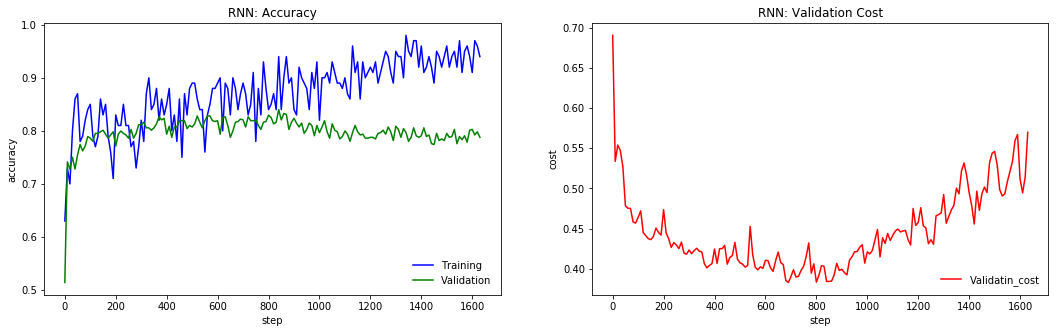

In [27]:
plt.figure(figsize=(18,5))
plt.subplot(121)
plt.plot(x_range, train_accuracies,'-b', label='Training')
plt.plot(x_range, val_accuracies,'-g', label='Validation')
plt.legend(loc='lower right', frameon=False)
# plt.ylim(ymax = 1.1, ymin = 0.7)
plt.ylabel('accuracy')
plt.xlabel('step')
plt.title('RNN: Accuracy')

plt.subplot(122)
plt.plot(x_range, val_costs,'-r', label='Validatin_cost')
plt.legend(loc='lower right', frameon=False)
# plt.ylim(ymax = 1.1, ymin = 0.7)
plt.ylabel('cost')
plt.xlabel('step')
plt.title('RNN: Validation Cost')
plt.show()

In [28]:
# 전체 테스트셋 정확도
acc = accuracy.eval(feed_dict={X: tok_embedding(X_test), Y: Y_test})
print('test accuracy:', acc)

print('0: negative, 1: positive')
pred = predicted.eval(feed_dict={X: tok_embedding([X_test[0]])}) 
print(X_test[0])
print('label:', tf.argmax(Y_test[0]).eval(), 'predicted', pred)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
  after removing the cwd from sys.path.


test accuracy: 0.8112214
0: negative, 1: positive
['정말/Noun', '여운/Noun', '이/Josa', '많이/Adverb', '남다/Verb', '영화/Noun', '다/Josa', './Punctuation', '청소년/Noun', '들/Suffix', '이/Josa', '못/Noun', '보다/Verb', '것/Noun', '에/Josa', '많다/Adjective', '안타깝다/Adjective', '움/Noun', '이/Josa', '남다/Verb']
label: 1 predicted [1]
